In [3]:
import os
import pandas as pd

In [4]:
quast = pd.read_csv("12122022_All_19_Isolates_All_Assemblies_quast_results_analysisfriendly.csv")

In [5]:
quast.head()

,Unnamed: 0,Assembly,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing,Source,# contigs (>= 0 bp),# contigs (>= 1000 bp),...,# contigs,Largest contig,Total length,GC (%),N50,N75,L50,L75,# N's per 100 kbp,Isolate_Pathname
0,0,EC_A_4957_3S1_D_CuP_CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Diseased,229,113,...,163,1889750,8064892,50.53,238124,106045,6,19,0,EC-A-4957-3S1-D-CuP-CeN_HLF_quast_output
1,0,EC_A_0012_C5_H_CuP_CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,6,6,...,6,5060504,5169485,50.53,5060504,5060504,1,1,0,EC-A-0012-C5-H-CuP-CeN_HLF_quast_output
2,0,EC_A_0205_C9_H_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,7,7,...,7,5070291,5267088,50.46,5070291,5070291,1,1,0,EC-A-0205-C9-H-CuP-CeP_HLF_quast_output
3,0,EC_E_3862_S2_D_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Diseased,197,111,...,137,426608,5109279,50.70,197395,71769,10,21,0,EC-E-3862-S2-D-CuP-CeP_HLF_quast_output
4,0,EC_A_4957_C3_H_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,5,5,...,5,5058920,5301894,50.78,5058920,5058920,1,1,0,EC-A-4957-C3-H-CuP-CeP_HLF_quast_output


In [6]:
quast.rename(columns = {'Total length':'Total_Length'}, inplace = True)

In [7]:
#One way ANOVA for overall effects on Type on Total length of genome
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('Total_Length ~ C(Category)', data=quast).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.899869


In [8]:
quast.head()

,Unnamed: 0,Assembly,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing,Source,# contigs (>= 0 bp),# contigs (>= 1000 bp),...,# contigs,Largest contig,Total_Length,GC (%),N50,N75,L50,L75,# N's per 100 kbp,Isolate_Pathname
0,0,EC_A_4957_3S1_D_CuP_CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Diseased,229,113,...,163,1889750,8064892,50.53,238124,106045,6,19,0,EC-A-4957-3S1-D-CuP-CeN_HLF_quast_output
1,0,EC_A_0012_C5_H_CuP_CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,6,6,...,6,5060504,5169485,50.53,5060504,5060504,1,1,0,EC-A-0012-C5-H-CuP-CeN_HLF_quast_output
2,0,EC_A_0205_C9_H_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,7,7,...,7,5070291,5267088,50.46,5070291,5070291,1,1,0,EC-A-0205-C9-H-CuP-CeP_HLF_quast_output
3,0,EC_E_3862_S2_D_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Diseased,197,111,...,137,426608,5109279,50.70,197395,71769,10,21,0,EC-E-3862-S2-D-CuP-CeP_HLF_quast_output
4,0,EC_A_4957_C3_H_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,5,5,...,5,5058920,5301894,50.78,5058920,5058920,1,1,0,EC-A-4957-C3-H-CuP-CeP_HLF_quast_output


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLUF: t-test independent samples, P_val:6.785e-01 t=4.179e-01
HLUF vs. HRF: t-test independent samples, P_val:3.125e-01 t=1.024e+00
HRF vs. HRUF: t-test independent samples, P_val:9.766e-01 t=-2.953e-02
HLF vs. HRF: t-test independent samples, P_val:2.152e-01 t=1.262e+00
HLF vs. HRUF: t-test independent samples, P_val:2.184e-01 t=1.253e+00


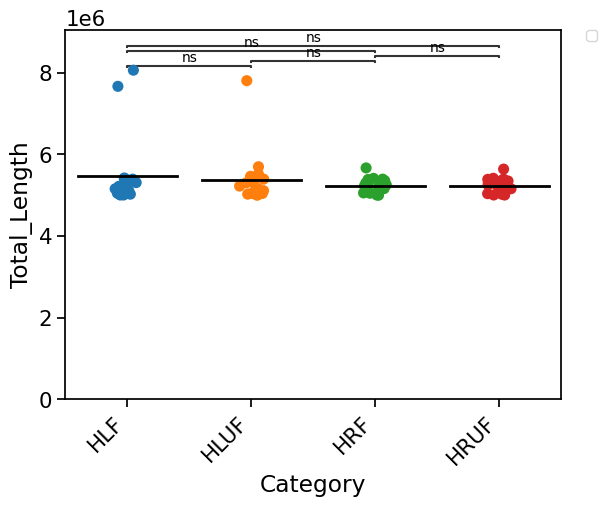

In [9]:
#Figure to show impact of Type on total length of genome specifically in hybrid assemblies; the impact of it is in Long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("HLF", "HLUF"), ("HLF","HRF"),("HLF", "HRUF"), ("HLUF", "HRF"), ("HRF", "HRUF"))
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Total_Length', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Total_Length", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Total_Length",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 1200000)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig('12122022_EcoliPlasmidDetection_S1d.png', dpi=300, bbox_inches="tight")

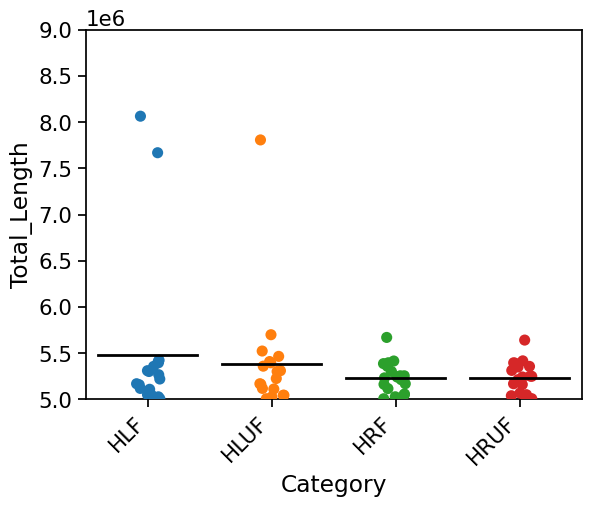

In [10]:
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Total_Length', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Total_Length", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Total_Length",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
ax.set_ylim([5000000, 9000000])
plt.savefig('12122022_EcoliPlasmidDetection_S1d.png', dpi=300, bbox_inches="tight")

In [11]:
quast.rename(columns = {'Largest contig':'Largest_Contig'}, inplace = True)

In [12]:
#One way ANOVA looking at overall impact of Types on Largest_Contig
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('Largest_Contig ~ C(Category)', data=quast).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.365391


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLUF: t-test independent samples, P_val:8.232e-01 t=-2.250e-01
HLUF vs. HRF: t-test independent samples, P_val:1.258e-01 t=-1.567e+00
HRF vs. HRUF: t-test independent samples, P_val:2.583e-01 t=1.149e+00
HLF vs. HRF: t-test independent samples, P_val:7.215e-02 t=-1.853e+00
HLF vs. HRUF: t-test independent samples, P_val:2.677e-01 t=-1.126e+00


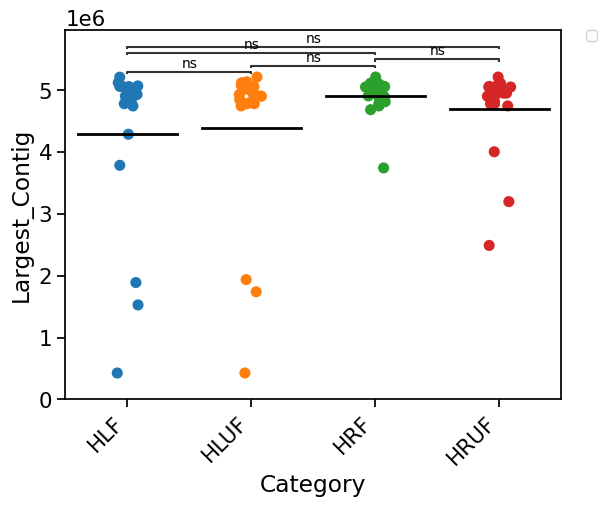

In [13]:
#Figure to show impact of Type on Largest_Contig specifically in hybrid assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("HLF", "HLUF"), ("HLF","HRF"),("HLF", "HRUF"), ("HLUF", "HRF"), ("HRF", "HRUF"))
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Largest_Contig', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Largest_Contig", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Largest_Contig",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 1000000)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S1c.png', dpi=300, bbox_inches="tight")

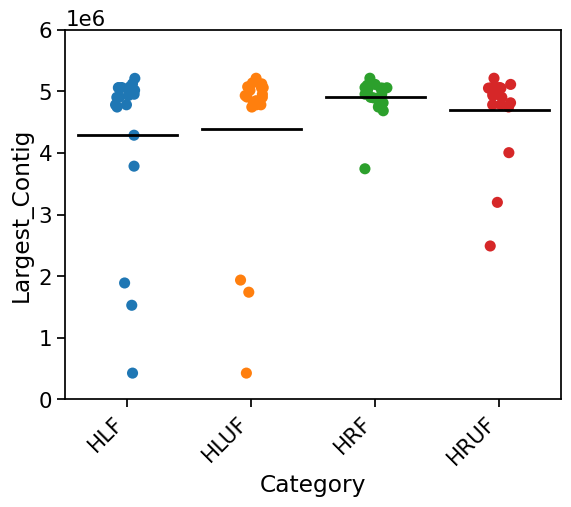

In [14]:
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Largest_Contig', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Largest_Contig", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Largest_Contig",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
plt.ylim(0, 6000000)
plt.savefig('12122022_EcoliPlasmidDetection_S1c.png', dpi=300, bbox_inches="tight")

In [15]:
quast.rename(columns = {'# contigs':'Number_Contigs'}, inplace = True)

In [16]:
#One way ANOVA for overall effects of Type on Number_Contigs
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('Number_Contigs ~ C(Category)', data=quast).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.020859


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLUF: t-test independent samples, P_val:5.291e-01 t=6.355e-01
HLUF vs. HRF: t-test independent samples, P_val:1.046e-01 t=1.665e+00
HRF vs. HRUF: t-test independent samples, P_val:2.047e-01 t=-1.292e+00
HLF vs. HRF: t-test independent samples, P_val:7.537e-02 t=1.831e+00
HLF vs. HRUF: t-test independent samples, P_val:1.069e-01 t=1.653e+00


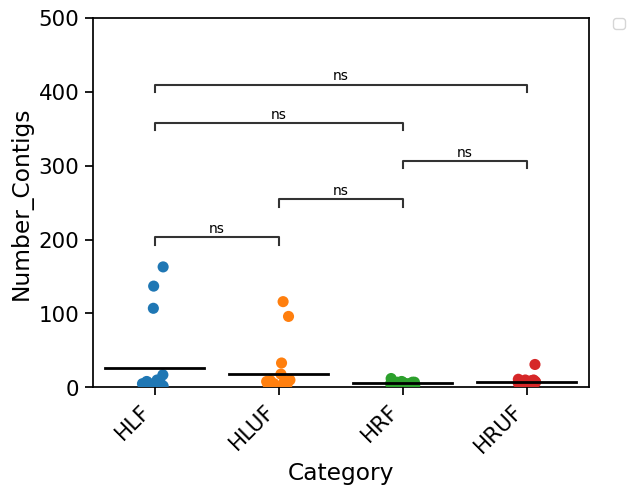

In [17]:
#Figure to show impact of Type on Largest_Contig specifically in hybrid assemblies, effect mostly seen in long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("HLF", "HLUF"), ("HLF","HRF"),("HLF", "HRUF"), ("HLUF", "HRF"), ("HRF", "HRUF"))
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Number_Contigs', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Number_Contigs", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Number_Contigs",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 500)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S1b.png', dpi=300, bbox_inches="tight")


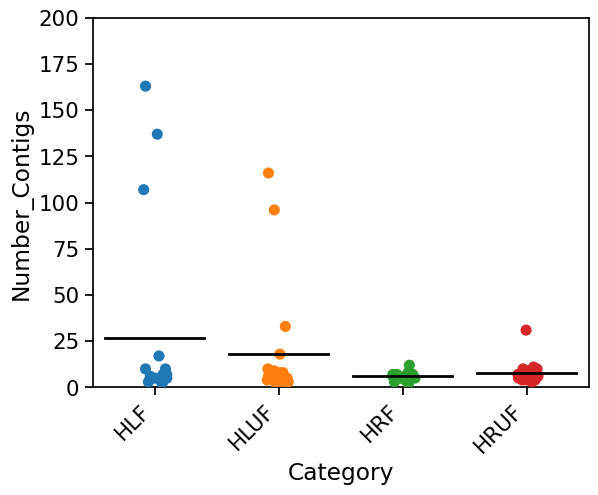

In [18]:
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Number_Contigs', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Number_Contigs", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Number_Contigs",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
plt.ylim(0, 200)
plt.savefig('12122022_EcoliPlasmidDetection_S1b.png', dpi=300, bbox_inches="tight")

In [19]:
quast.rename(columns = {'GC (%)':'GC_Content'}, inplace = True)

In [20]:
#One way ANOVA to see overall impact of Type on GC_Content
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('GC_Content ~ C(Category)', data=quast).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.232607


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLUF: t-test independent samples, P_val:9.447e-01 t=-6.990e-02
HLUF vs. HRF: t-test independent samples, P_val:9.571e-01 t=-5.422e-02
HRF vs. HRUF: t-test independent samples, P_val:9.674e-01 t=4.122e-02
HLF vs. HRF: t-test independent samples, P_val:8.992e-01 t=-1.276e-01
HLF vs. HRUF: t-test independent samples, P_val:9.327e-01 t=-8.510e-02


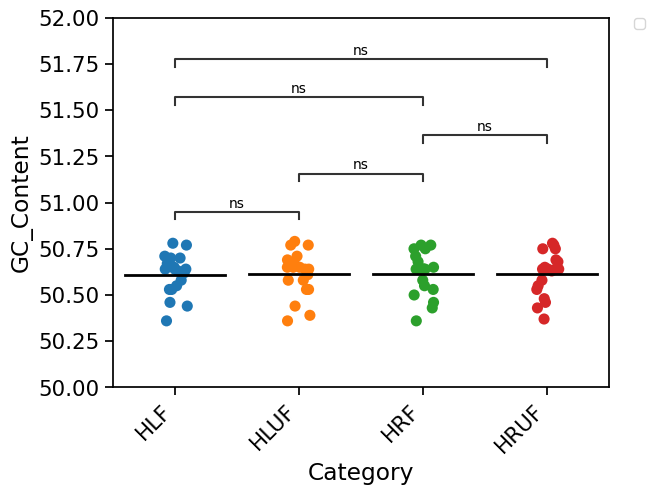

In [21]:
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("HLF", "HLUF"), ("HLF","HRF"),("HLF", "HRUF"), ("HLUF", "HRF"), ("HRF", "HRUF"))
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'GC_Content', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="GC_Content", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="GC_Content",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(50, 52)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S1e.png', dpi=300, bbox_inches="tight")

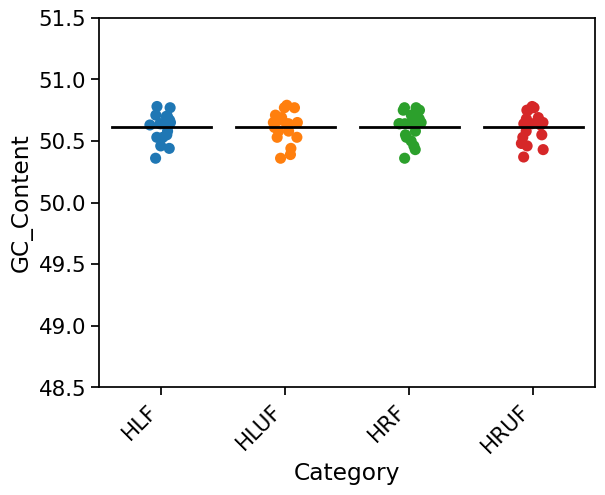

In [22]:
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'GC_Content', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="GC_Content", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="GC_Content",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(48.5, 51.5)

plt.savefig('12122022_EcoliPlasmidDetection_S1e.png', dpi=300, bbox_inches="tight")

In [23]:
#One way ANOVA to see overall impact on N50 on Type
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('N50 ~ C(Category)', data=quast).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.318997


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLUF: t-test independent samples, P_val:7.503e-01 t=-3.207e-01
HLUF vs. HRF: t-test independent samples, P_val:1.147e-01 t=-1.616e+00
HRF vs. HRUF: t-test independent samples, P_val:2.557e-01 t=1.155e+00
HLF vs. HRF: t-test independent samples, P_val:6.694e-02 t=-1.889e+00
HLF vs. HRUF: t-test independent samples, P_val:2.055e-01 t=-1.289e+00


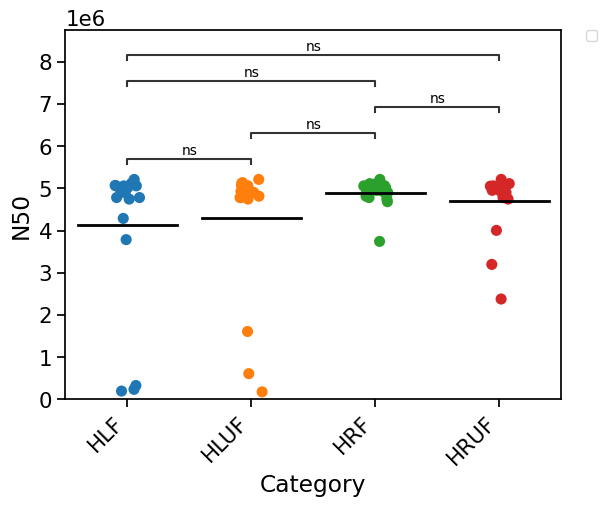

In [24]:
#Figure to show impact of Type Number_Contigs specifically in hybrid assemblies, effect mostly seen in long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("HLF", "HLUF"), ("HLF","HRF"),("HLF", "HRUF"), ("HLUF", "HRF"), ("HRF", "HRUF"))
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'N50', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="N50", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="N50",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 6000000)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S1a.png', dpi=300, bbox_inches="tight")

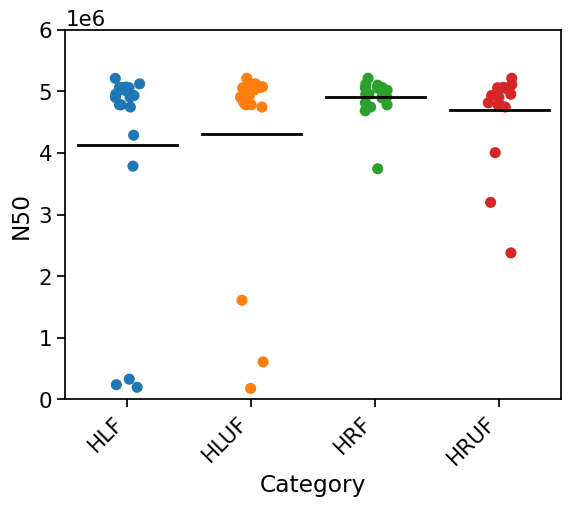

In [25]:
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'N50', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="N50", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="N50",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 6000000)

plt.savefig('12122022_EcoliPlasmidDetection_S1a.png', dpi=300, bbox_inches="tight")

In [39]:
quast

,Unnamed: 0,Assembly,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing,Source,# contigs (>= 0 bp),# contigs (>= 1000 bp),...,# contigs,Largest contig,Total length,GC (%),N50,N75,L50,L75,# N's per 100 kbp,Isolate_Pathname
0,0,EC_A_4957_3S1_D_CuP_CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Diseased,229,113,...,163,1889750,8064892,50.53,238124,106045,6,19,0,EC-A-4957-3S1-D-CuP-CeN_HLF_quast_output
1,0,EC_A_0012_C5_H_CuP_CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,6,6,...,6,5060504,5169485,50.53,5060504,5060504,1,1,0,EC-A-0012-C5-H-CuP-CeN_HLF_quast_output
2,0,EC_A_0205_C9_H_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,7,7,...,7,5070291,5267088,50.46,5070291,5070291,1,1,0,EC-A-0205-C9-H-CuP-CeP_HLF_quast_output
3,0,EC_E_3862_S2_D_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Diseased,197,111,...,137,426608,5109279,50.70,197395,71769,10,21,0,EC-E-3862-S2-D-CuP-CeP_HLF_quast_output
4,0,EC_A_4957_C3_H_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,5,5,...,5,5058920,5301894,50.78,5058920,5058920,1,1,0,EC-A-4957-C3-H-CuP-CeP_HLF_quast_output
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0,EC_B1_7578_1L2_D_CuP_CeP,LRUFMP,Long_Read,Rapid,Unfiltered,Medaka_Pilon,Diseased,6,6,...,6,2487671,5013245,50.36,2375049,2375049,2,2,0,EC-B1-7578-1L2-D-CuP-CePMP_quast_output
300,0,EC_C_6245_1H1_D_CuP_CeP,LRUFMP,Long_Read,Rapid,Unfiltered,Medaka_Pilon,Diseased,4,4,...,4,4784653,5004154,50.57,4784653,4784653,1,1,0,EC-C-6245-1H1-D-CuP-CePMP_quast_output
301,0,EC_B1_9413_C4_H_CuP_CeP,LRUFMP,Long_Read,Rapid,Unfiltered,Medaka_Pilon,Cecal,10,10,...,10,4020627,5099903,50.70,4020627,4020627,1,1,0,EC-B1-9413-C4-H-CuP-CePMP_quast_output
302,0,EC_E_2402_1H1_D_CuP_CeP,LRUFMP,Long_Read,Rapid,Unfiltered,Medaka_Pilon,Diseased,4,4,...,4,4870876,5063593,50.90,4870876,4870876,1,1,0,EC-E-2402-1H1-D-CuP-CePMP_quast_output


In [5]:
quast_LR = quast[quast['Assembly_Type'].str.contains("Long_Read")]

In [6]:
quastLRup = quast_LR[quast_LR['Polishing'].str.contains("Unpolished")]

In [7]:
quastLRup

,Unnamed: 0,Assembly,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing,Source,# contigs (>= 0 bp),# contigs (>= 1000 bp),...,# contigs,Largest contig,Total length,GC_Content,N50,N75,L50,L75,# N's per 100 kbp,Isolate_Pathname
76,0,EC_B1_7578_1L2_D_CuP_CeP,LLF,Long_Read,Ligation,Filtering,Unpolished,Diseased,2,2,...,2,4894845,5009101,50.40,4894845,4894845,1,1,0,EC-B1-7578-1L2-D-CuP-CeP_LLF_quast_output
77,0,EC_D_9226_3H1_D_CuP_CeP,LLF,Long_Read,Ligation,Filtering,Unpolished,Diseased,15,15,...,15,4950493,5517159,50.81,4950493,4950493,1,1,0,EC-D-9226-3H1-D-CuP-CeP_LLF_quast_output
78,0,EC_G_9619_2L1_D_CuP_CeP,LLF,Long_Read,Ligation,Filtering,Unpolished,Diseased,3,3,...,3,5204820,5404112,50.85,5204820,5204820,1,1,0,EC-G-9619-2L1-D-CuP-CeP_LLF_quast_output
79,0,EC_E_6245_2L1_D_CuP_CeP,LLF,Long_Read,Ligation,Filtering,Unpolished,Diseased,3,3,...,3,4773535,4989973,50.75,4773535,4773535,1,1,0,EC-E-6245-2L1-D-CuP-CeP_LLF_quast_output
80,0,EC_D_9226_2S1_D_CuP_CeP,LLF,Long_Read,Ligation,Filtering,Unpolished,Diseased,5,5,...,5,2841403,5586084,50.43,2841403,1422270,1,2,0,EC-D-9226-2S1-D-CuP-CeP_LLF_quast_output
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,EC_E_6245_2L1_D_CuP_CeP,LRUF,Long_Read,Rapid,Unfiltered,Unpolished,Diseased,3,3,...,3,4770561,4986842,50.59,4770561,4770561,1,1,0,EC-E-6245-2L1-D-CuP-CeP_quast_output
262,0,EC_G_0205_3S1_D_CuP_CeP,LRUF,Long_Read,Rapid,Unfiltered,Unpolished,Diseased,5,5,...,5,5054829,5377837,50.52,5054829,5054829,1,1,0,EC-G-0205-3S1-D-CuP-CeP_quast_output
263,0,EC_C_23315_C5_H_CuP_CeP,LRUF,Long_Read,Rapid,Unfiltered,Unpolished,Cecal,6,6,...,6,4794774,5146515,50.67,4794774,4794774,1,1,0,EC-C-23315-C5-H-CuP-CeP_quast_output
264,0,EC_D_9226_3H1_D_CuP_CeP,LRUF,Long_Read,Rapid,Unfiltered,Unpolished,Diseased,4,4,...,4,4940683,5199773,50.68,4940683,4940683,1,1,0,EC-D-9226-3H1-D-CuP-CeP_quast_output


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLUF: t-test independent samples, P_val:9.689e-01 t=-3.921e-02
LLUF vs. LRF: t-test independent samples, P_val:5.273e-02 t=-2.003e+00
LRF vs. LRUF: t-test independent samples, P_val:8.459e-02 t=1.774e+00
LLF vs. LRF: t-test independent samples, P_val:3.049e-02 t=-2.252e+00
LLF vs. LRUF: t-test independent samples, P_val:3.602e-01 t=-9.269e-01


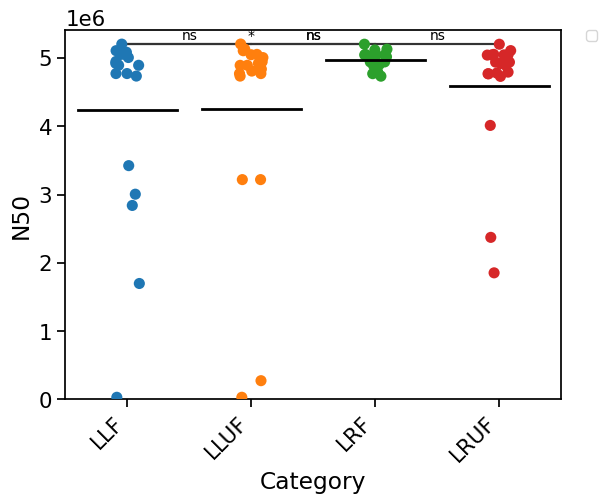

In [55]:
#figure showing impact of Type on N50 for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns
states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"))
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quastLRup,'x': 'Category', 'y': 'N50', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="N50", data=quastLRup, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="N50",
            data=quastLRup,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 500)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('03152023_EcoliPlasmidDetection_S2a.png', dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLUF: t-test independent samples, P_val:9.689e-01 t=-3.921e-02
LLUF vs. LRF: t-test independent samples, P_val:5.273e-02 t=-2.003e+00
LRF vs. LRUF: t-test independent samples, P_val:8.459e-02 t=1.774e+00
LLF vs. LRF: t-test independent samples, P_val:3.049e-02 t=-2.252e+00
LLF vs. LRUF: t-test independent samples, P_val:3.602e-01 t=-9.269e-01


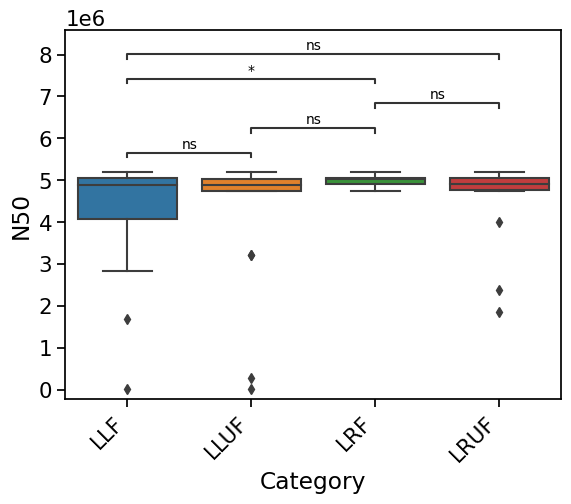

In [56]:
states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'N50', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="N50", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
medians = quast.groupby(['Category'])['N50'].median()
vertical_offset = quast['N50'].median() * 0.05 # offset from median for display

#for xtick in ax.get_xticks():
    #ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            #horizontalalignment='center',size='x-small',color='b',weight='semibold')
    
import seaborn as sns
import matplotlib.pyplot as plt
#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig('03152022_EcoliPlasmidDetection_S2a_nostats.png', dpi=300, bbox_inches="tight")

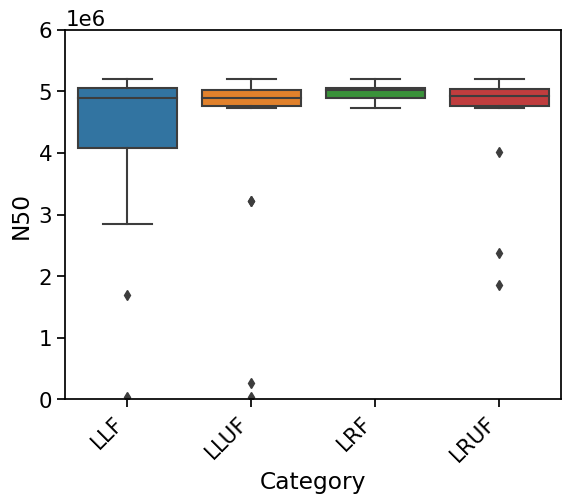

In [57]:
states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'N50', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="N50", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
medians = quast.groupby(['Category'])['N50'].median()
vertical_offset = quast['N50'].median() * 0.05 # offset from median for display

#for xtick in ax.get_xticks():
    #ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            #horizontalalignment='center',size='x-small',color='b',weight='semibold')
    
import seaborn as sns
import matplotlib.pyplot as plt

plt.ylim(0, 6000000)
plt.savefig('03152022_EcoliPlasmidDetection_S2a_nostats.png', dpi=300, bbox_inches="tight")

/tmp/ipykernel_1550860/2570997186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quastLRup.rename(columns = {'GC(%)':'GC_Content'}, inplace = True)


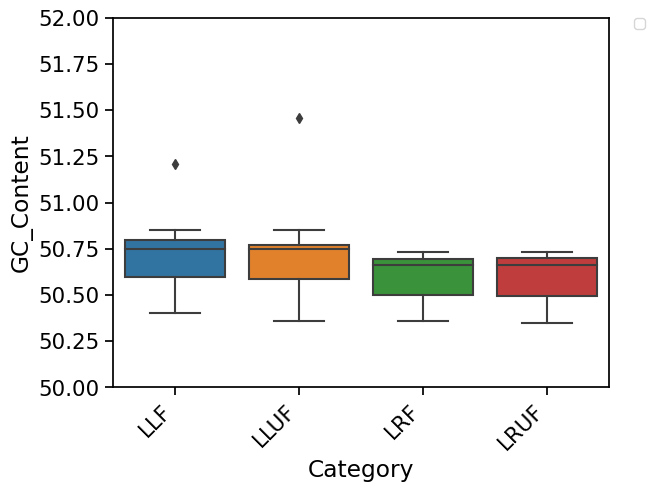

In [58]:
#figure showing impact of Type on GC_Content for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"))


states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'GC_Content', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="GC_Content", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(50, 52)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('03152022_EcoliPlasmidDetection_S2e_nostats.png', dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLUF: t-test independent samples, P_val:9.938e-01 t=7.840e-03
LLUF vs. LRF: t-test independent samples, P_val:6.837e-02 t=1.879e+00
LRF vs. LRUF: t-test independent samples, P_val:9.898e-01 t=-1.293e-02
LLF vs. LRF: t-test independent samples, P_val:2.889e-02 t=2.276e+00
LLF vs. LRUF: t-test independent samples, P_val:3.088e-02 t=2.247e+00


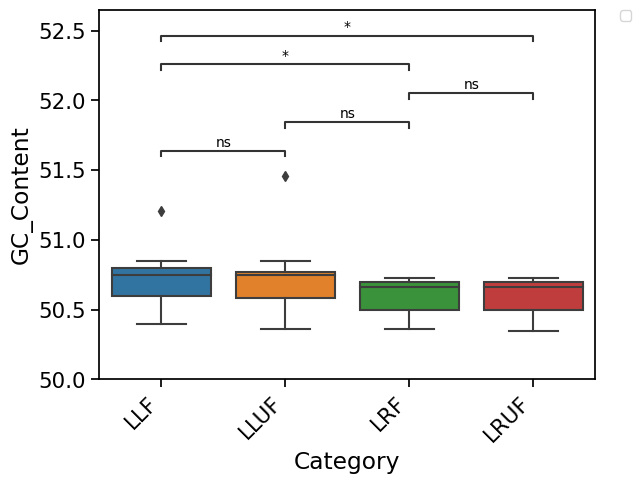

In [74]:
#figure showing impact of Type on GC_Content for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"))


states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'GC_Content', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="GC_Content", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(50, 52)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('03152022_EcoliPlasmidDetection_S2e_stats.png', dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLUF: t-test independent samples, P_val:3.195e-01 t=-1.010e+00
LLUF vs. LRF: t-test independent samples, P_val:1.128e-01 t=1.625e+00
LRF vs. LRUF: t-test independent samples, P_val:4.326e-03 t=-3.046e+00
LLF vs. LRF: t-test independent samples, P_val:2.290e-02 t=2.377e+00
LLF vs. LRUF: t-test independent samples, P_val:3.305e-01 t=9.865e-01


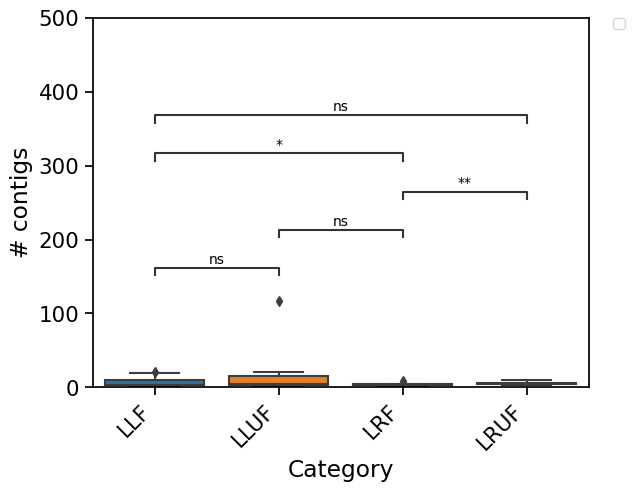

In [73]:
#figure showing impact of Type on Number_Contigs for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"))

states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': '# contigs', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="# contigs", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 500)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('03152022_EcoliPlasmidDetection_S2b_stats.png', dpi=300, bbox_inches="tight")

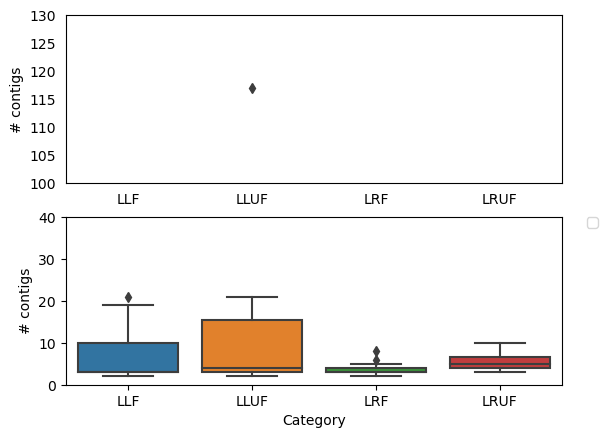

In [31]:
##### figure showing impact of Type on Number_Contigs for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"))

states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quastLRup,'x': 'Category', 'y': '# contigs', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharey=False)
ax=sns.boxplot(x="Category", y="# contigs", data=quastLRup, order=states_subcat, ax=ax2)
ax=sns.boxplot(x="Category", y="# contigs", data=quastLRup, order=states_subcat, ax=ax1)

ax2.set_ylim(0, 40)
ax1.set_ylim(100, 130)
ax.set(xlabel=None)
ax.tick_params(left=False, bottom=False)
import seaborn as sns
import matplotlib.pyplot as plt


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.savefig('03152022_EcoliPlasmidDetection_S2b.png', dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLUF: t-test independent samples, P_val:9.775e-01 t=-2.846e-02
LLUF vs. LRF: t-test independent samples, P_val:5.031e-02 t=-2.025e+00
LRF vs. LRUF: t-test independent samples, P_val:8.427e-02 t=1.776e+00
LLF vs. LRF: t-test independent samples, P_val:3.141e-02 t=-2.239e+00
LLF vs. LRUF: t-test independent samples, P_val:3.902e-01 t=-8.697e-01


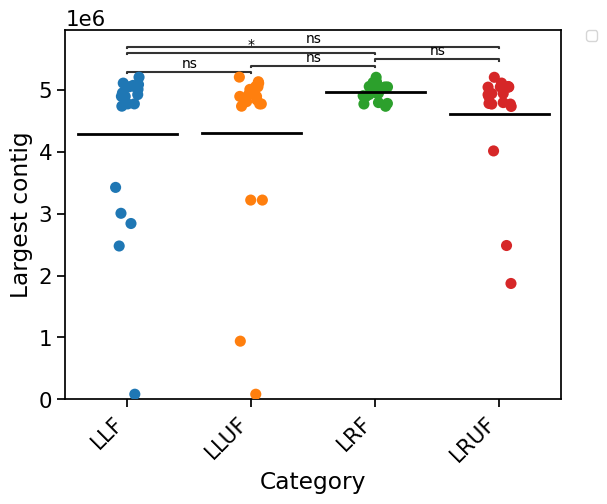

In [22]:
#figure showing impact of Type on Largest_Contig for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"))
states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Largest contig', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Largest contig", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Largest contig",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 1000000)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('03152022_EcoliPlasmidDetection_S2c.png', dpi=300, bbox_inches="tight")

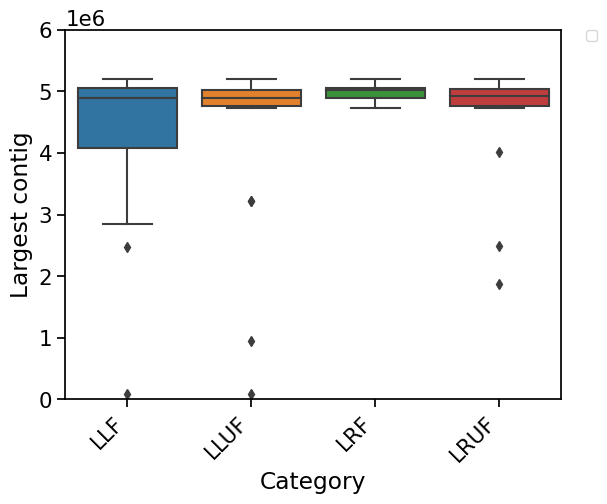

In [69]:
#figure showing impact of Type on Largest_Contig for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

#pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"), ('LLF', 'LLFM'), ('LLF', 'LLFMP'), ('LLUF', 'LLUFM'), ('LLUF', 'LLUFMP'), ("LRF", "LRFM"), ('LRF', 'LRFMP'), ('LRUF', 'LRUFM'), ('LRUF', 'LRUFMP'))
states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Largest contig', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="Largest contig", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")

import seaborn as sns
import matplotlib.pyplot as plt


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 6000000)
plt.savefig('0315122022_EcoliPlasmidDetection_S2c_nostats.png', dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLUF: t-test independent samples, P_val:8.396e-01 t=-2.039e-01
LLUF vs. LRF: t-test independent samples, P_val:5.878e-01 t=-5.469e-01
LRF vs. LRUF: t-test independent samples, P_val:9.913e-01 t=1.101e-02
LLF vs. LRF: t-test independent samples, P_val:3.915e-01 t=-8.673e-01
LLF vs. LRUF: t-test independent samples, P_val:3.930e-01 t=-8.646e-01


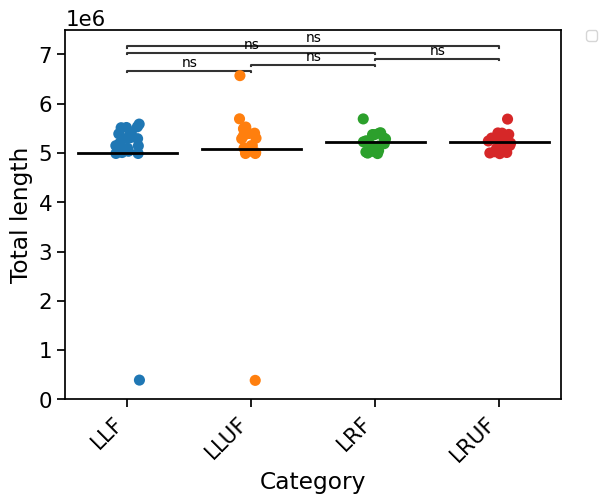

In [70]:
#figure showing impact of Type on Total_Length for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"))
states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Total length', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Total length", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Total length",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 1200000)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('03152022_EcoliPlasmidDetection_S2d.png', dpi=300, bbox_inches="tight")

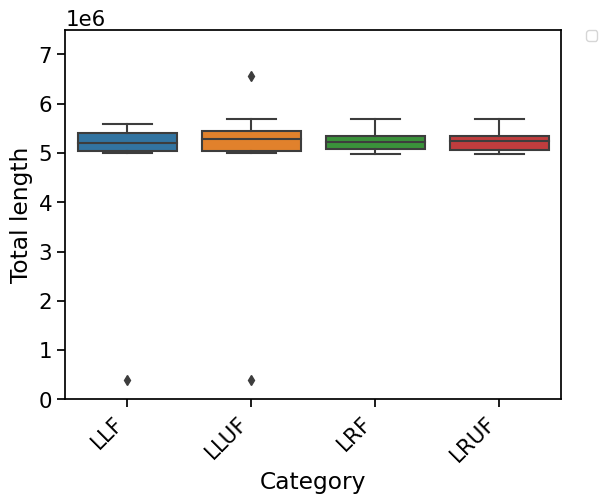

In [72]:
#figure showing impact of Type on Total_Length for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"))
states_subcat =["LLF", "LLUF", "LRF", "LRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Total length', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="Total length", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 7500000)

import seaborn as sns
import matplotlib.pyplot as plt

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.savefig('0315122022_EcoliPlasmidDetection_S2d.png', dpi=300, bbox_inches="tight")